# MBB (7:3)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/MBB.csv',sep=",")

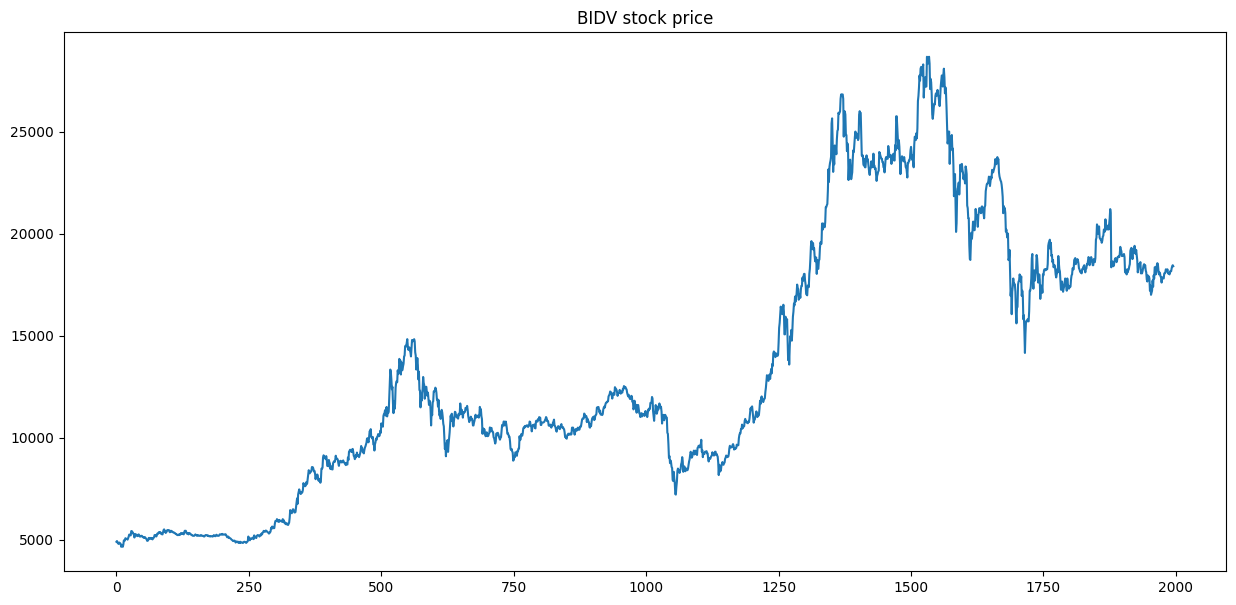

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.7 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 16.8 MB/s eta 0:00:00


In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 4988.145624293902
Testing MAPE: 22.75117711024276
Testing MSLE: 0.0546029756838641


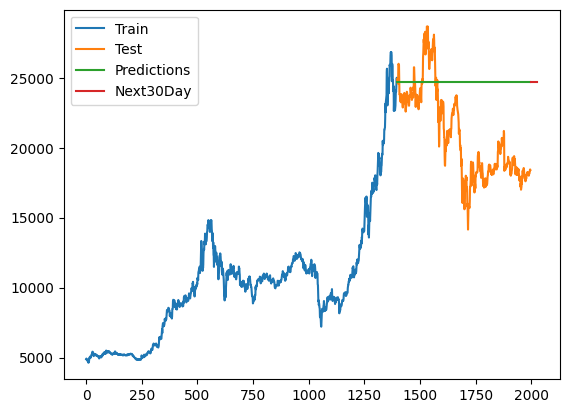

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# MBB (8:2)



In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/MBB.csv',sep=",")

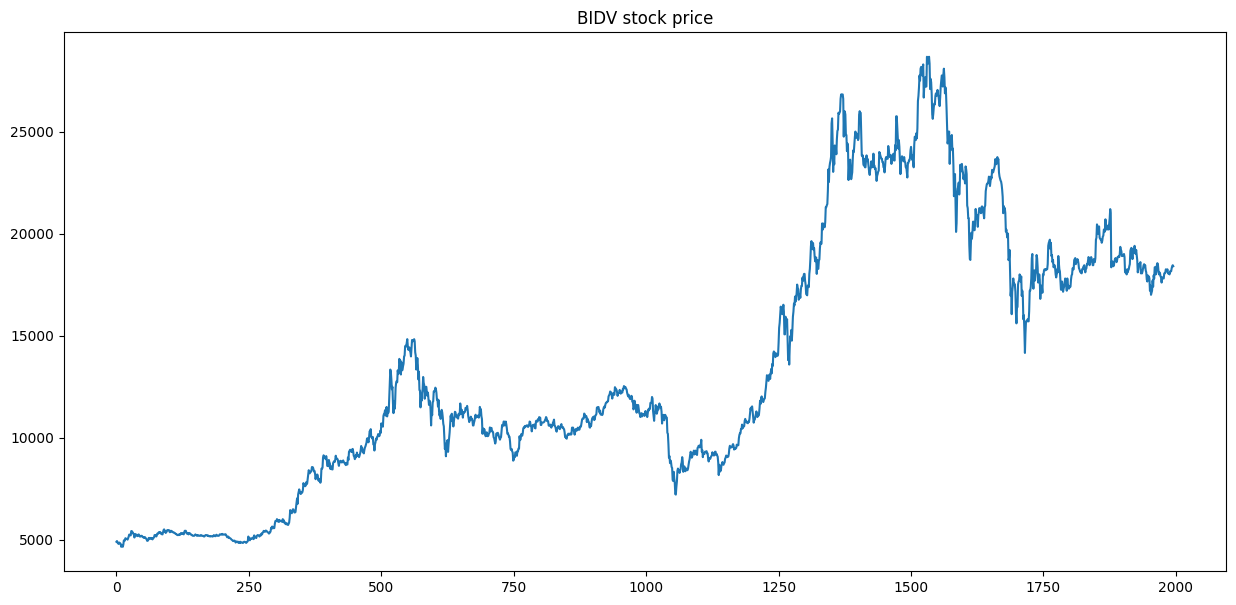

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 4659.580198014322
Testing MAPE: 23.68769868545371
Testing MSLE: 0.05167793259890938


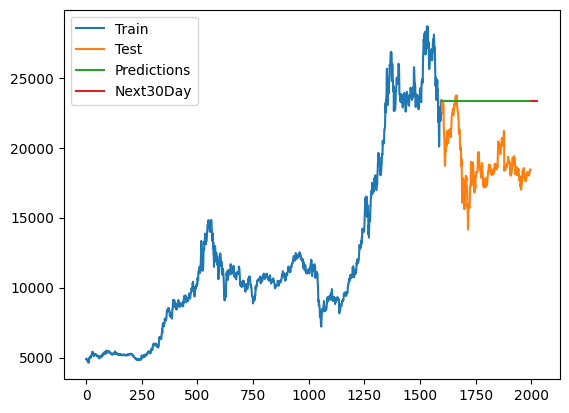

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# MBB (9:1)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/MBB.csv',sep=",")

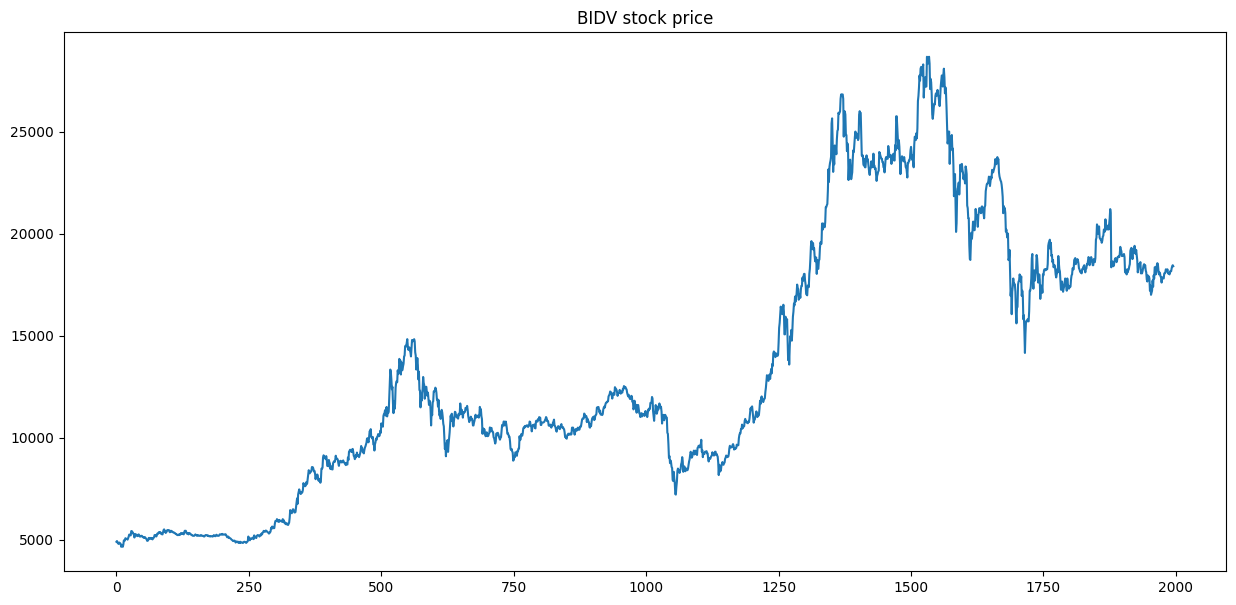

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.9 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 1137.415506536891
Testing MAPE: 4.563508654408886
Testing MSLE: 0.003678879984106443


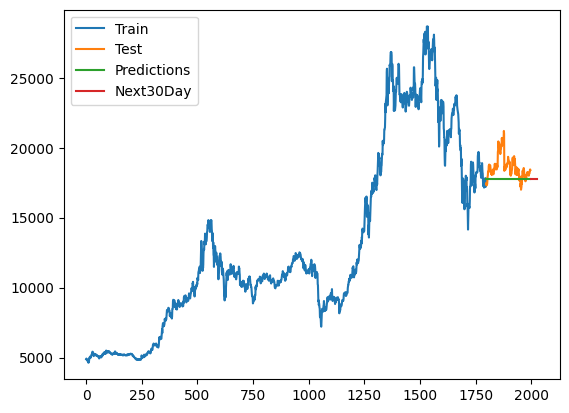

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()